#Домашняя работа №4

*Реализовать минимум 5 классификаторов, сравнить метрики между собой, выбрать лучший для датасета Titanic (вариант 4).*

Настройки и загрузка данных

In [22]:
!pip install catboost lightgbm xgboost -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для визуализации
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

# --- 1. Загрузка данных ---

print("--- 1. Загрузка данных ---")
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

--- 1. Загрузка данных ---


Saving train.csv to train (21).csv


Работа с данными


--- 2. Разведочный анализ данных (EDA) ---

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  IsAlone      891 non-null    int64  
 15  Deck         891 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 111.5+ KB

Ан

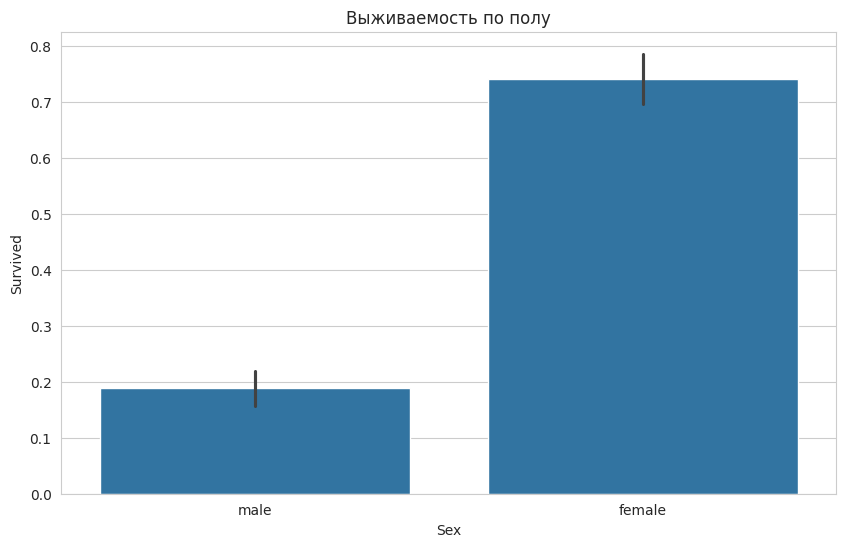

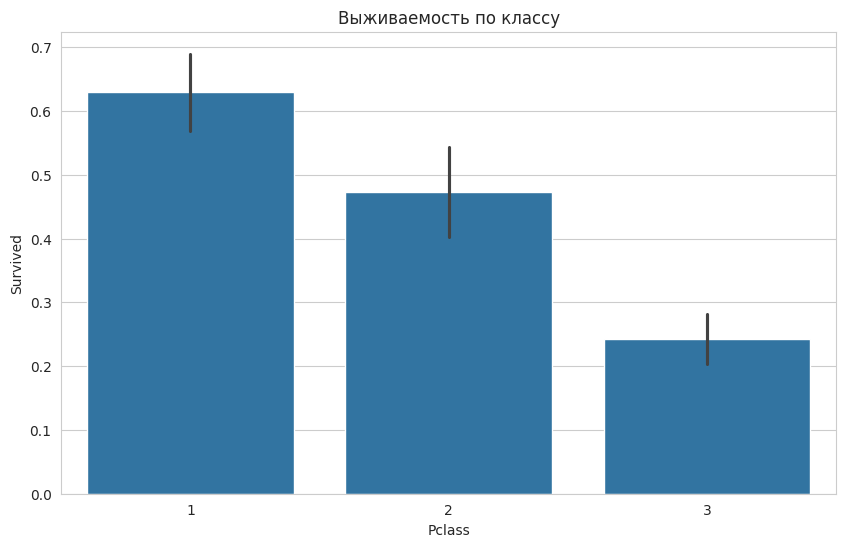

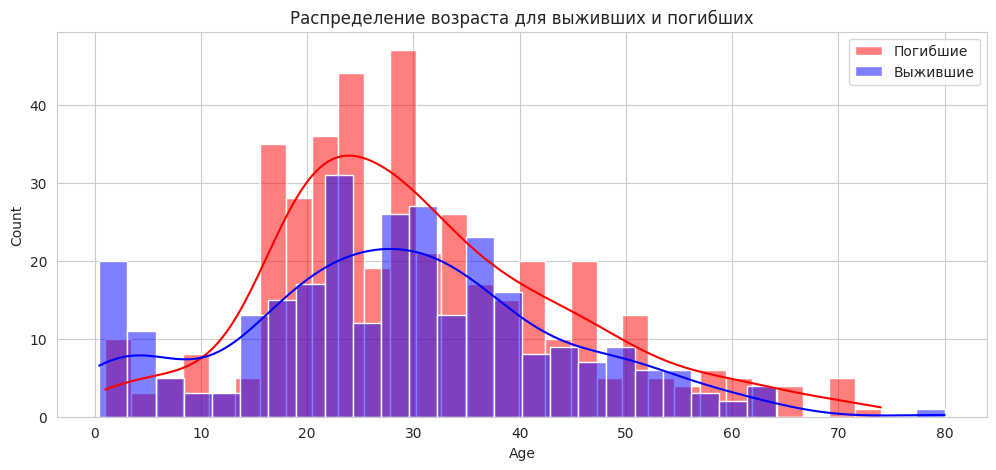



--- 5. Обучение и оценка моделей ---
Обучение: Gradient Boosting...
Обучение: CatBoost...
Обучение: Ada Boost...
Обучение: Extra Trees...
Обучение: QDA...
Обучение: LightGBM...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Обучение: K Neighbors...
Обучение: Decision Tree...
Обучение: XGBoost...
Обучение: Dummy (Stratified)...
Обучение: SVM (Linear)...

--- 6. Анализ важности признаков ---


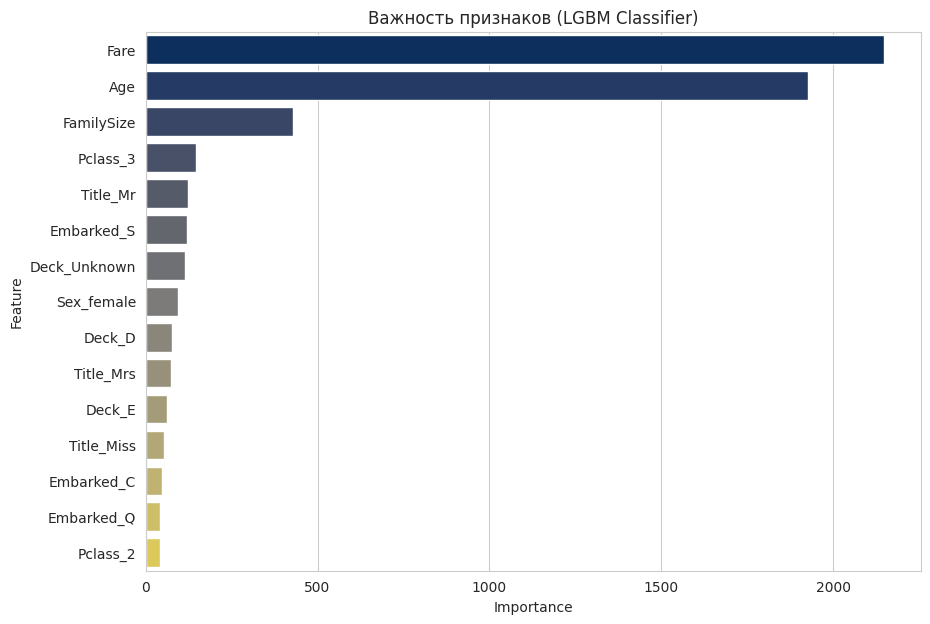


--- 7. Сводная таблица метрик (Сортировка по F1-Score) ---
                    Accuracy  Precision  Recall  F1-Score  ROC-AUC
SVM (Linear)          0.8436     0.8254  0.7536    0.7879   0.8489
LightGBM              0.8212     0.7681  0.7681    0.7681   0.8268
XGBoost               0.8212     0.7937  0.7246    0.7576   0.8435
Ada Boost             0.8045     0.7297  0.7826    0.7552   0.8342
Gradient Boosting     0.8156     0.7812  0.7246    0.7519   0.8368
K Neighbors           0.8101     0.7778  0.7101    0.7424   0.8482
CatBoost              0.8101     0.7966  0.6812    0.7344   0.8514
Extra Trees           0.8045     0.7742  0.6957    0.7328   0.8389
QDA                   0.8156     0.8462  0.6377    0.7273   0.8573
Decision Tree         0.7877     0.8163  0.5797    0.6780   0.8429
Dummy (Stratified)    0.5196     0.3651  0.3333    0.3485   0.4848

--- 8. Визуализация матриц истинности ---


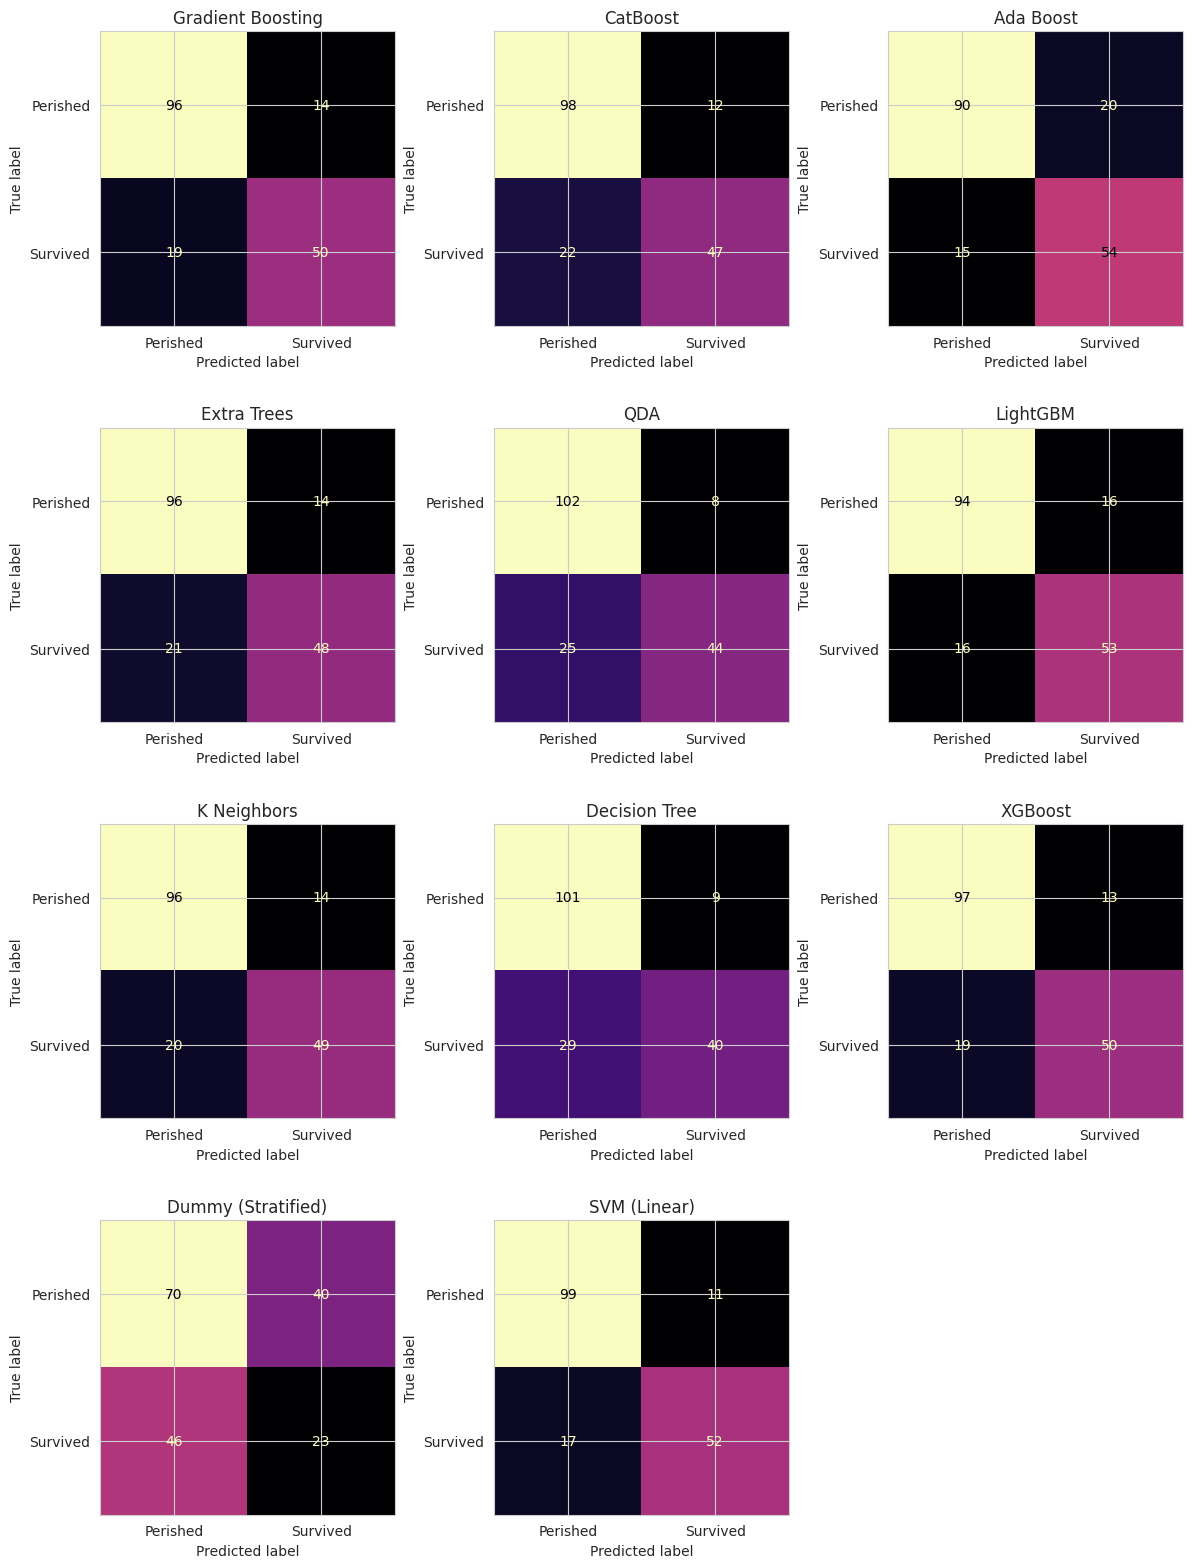


--- ВЫВОД ---
Лучший классификатор по F1-Score: SVM (Linear)
Его метрики: F1-Score  = 0.7879
             Accuracy  = 0.8436
             Precision = 0.8254
             Recall    = 0.7536
             ROC-AUC   = 0.8489


In [34]:
# --- 2. Разведочный анализ данных (EDA) ---
print("\n--- 2. Разведочный анализ данных (EDA) ---")

# Общая информация
print("\nОбщая информация о данных:")
df.info()

# Анализ пропусков
print("\nАнализ пропусков:")
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
print(missing_data)
# Cabin имеет слишком много пропусков (более 70%) и будет использоваться для извлечения первой буквы
# Age, Embarked, Fare будут обработаны импутацией.

# Визуальный анализ выживаемости по ключевым признакам

# Выживаемость по полу (Sex)
sns.barplot(x='Sex', y='Survived', data=df).set_title('Выживаемость по полу')
plt.show()
print("")

# Выживаемость по классу (Pclass)
sns.barplot(x='Pclass', y='Survived', data=df).set_title('Выживаемость по классу')
plt.show()
print("")

# Распределение возраста (Age) для выживших и погибших
plt.figure(figsize=(12, 5))
sns.histplot(df[df['Survived'] == 0]['Age'].dropna(), bins=30, kde=True, color='red', label='Погибшие')
sns.histplot(df[df['Survived'] == 1]['Age'].dropna(), bins=30, kde=True, color='blue', label='Выжившие')
plt.title('Распределение возраста для выживших и погибших')
plt.legend()
plt.show()
print("")


# --- 3. Инженеринг признаков (Feature Engineering) ---

# 3.1 Извлечение титула из имени (Name)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
# Объединение редких титулов
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Lady', 'Don', 'Capt', 'Mme', 'Ms', 'Mlle', 'Jonkheer']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 3.2 Создание признака размера семьи (FamilySize)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3.3 Создание признака "Одинокий" (IsAlone)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 3.4 Извлечение признака "Палуба" (Deck) из Cabin
df['Deck'] = df['Cabin'].str[0].fillna('Unknown')
# Группировка редких палуб
df['Deck'] = df['Deck'].replace(['T'], 'Unknown')

# --- 4. Подготовка данных для моделирования ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay
)

# Целевая переменная
y = df['Survived']
# Выбираем признаки после инженерии
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'Deck']].copy()

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Определение типов признаков
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone', 'Deck']

# Создание пайплайна для предобработки
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Применение предобработки
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получение названий признаков после One-Hot кодирования
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))


# --- 5. Обучение и оценка классификаторов ---

# Классификаторы
from sklearn.ensemble import (
    GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
)
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Словарь для хранения моделей
classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42,n_estimators=200, max_depth=3, learning_rate=0.1, min_samples_leaf=5),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, iterations=300, learning_rate=0.05, depth=6,  subsample=0.85, border_count=128),
    'Ada Boost': AdaBoostClassifier(random_state=42, estimator=DecisionTreeClassifier(max_depth=1)),
    'Extra Trees': ExtraTreesClassifier(random_state=42,n_estimators=300, max_depth=10, min_samples_split=5, max_features=0.7),
    'QDA': QuadraticDiscriminantAnalysis(reg_param=0.2),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1,n_estimators=300, num_leaves=20, learning_rate=0.05, min_child_samples=10),
    'K Neighbors': KNeighborsClassifier(n_neighbors=7, weights='distance', p=1),
    'Decision Tree': DecisionTreeClassifier(random_state=42,max_depth=5, min_samples_leaf=10),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss',n_estimators=300, max_depth=7, learning_rate=0.05, gamma=0.1, subsample=0.7),
    'Dummy (Stratified)': DummyClassifier(strategy='stratified', random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True, C=0.1, gamma='auto')
}

# DataFrame для хранения метрик
metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
confusion_matrices = {}
model_pipelines = {}

print("\n--- 5. Обучение и оценка моделей ---")
for name, model in classifiers.items():
    print(f"Обучение: {name}...")

    # Создаем полный пайплайн: Предобработка + Классификатор
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    try:
        # Обучаем пайплайн на ИСХОДНЫХ (необработанных) данных X_train
        full_pipeline.fit(X_train, y_train)

        # Предсказываем, используя X_test
        y_pred = full_pipeline.predict(X_test)

        # Расчет метрик
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Расчет ROC-AUC: используем transform для извлечения предобработанных данных
        classifier = full_pipeline.named_steps['classifier']
        X_test_processed = full_pipeline.named_steps['preprocessor'].transform(X_test)

        if hasattr(classifier, "predict_proba"):
            y_proba = classifier.predict_proba(X_test_processed)[:, 1]
        elif hasattr(classifier, "decision_function"):
            y_proba = classifier.decision_function(X_test_processed)
        else:
             y_proba = y_pred # Приближение для моделей без явного проба

        roc_auc = roc_auc_score(y_test, y_proba)

        metrics_df.loc[name] = [accuracy, precision, recall, f1, roc_auc]
        confusion_matrices[name] = confusion_matrix(y_test, y_pred)
        model_pipelines[name] = full_pipeline # Сохраняем пайплайн для анализа важности

    except Exception as e:
        metrics_df.loc[name] = [np.nan] * 5
        print(f"Ошибка при обучении/оценке {name}: {e}")


# --- 6. Анализ важности признаков (Feature Importance) ---

print("\n--- 6. Анализ важности признаков ---")
# Используем LGBM
lgbm_pipeline = model_pipelines['LightGBM']
lgbm_model = lgbm_pipeline.named_steps['classifier']

# Получаем названия признаков после предобработки
onehot_feature_names = lgbm_pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names_processed = numerical_features + list(onehot_feature_names)

# Получаем важность
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_processed,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Визуализация важности
plt.figure(figsize=(10, 7))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(15),
    palette='cividis',
    hue='Feature', # Назначаем y-переменную параметру hue
    legend=False   # Скрываем избыточную легенду
)
plt.title('Важность признаков (LGBM Classifier)')
plt.show()
#


# --- 7. Сравнение метрик и вывод ---

print("\n--- 7. Сводная таблица метрик (Сортировка по F1-Score) ---")
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)
print(metrics_df.round(4))

print("\n--- 8. Визуализация матриц истинности ---")
n_cols = 3
n_rows = (len(classifiers) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Perished', 'Survived'])
    disp.plot(ax=axes[i], cmap=plt.cm.magma, colorbar=False)
    axes[i].title.set_text(name)

for j in range(len(confusion_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#

# Вывод
best_model_name = metrics_df.index[0]
print(f"\n--- ВЫВОД ---")
print(f"Лучший классификатор по F1-Score: {best_model_name}")
print(f"Его метрики: F1-Score  = {metrics_df.loc[best_model_name]['F1-Score']:.4f}")
print(f"             Accuracy  = {metrics_df.loc[best_model_name]['Accuracy']:.4f}")
print(f"             Precision = {metrics_df.loc[best_model_name]['Precision']:.4f}")
print(f"             Recall    = {metrics_df.loc[best_model_name]['Recall']:.4f}")
print(f"             ROC-AUC   = {metrics_df.loc[best_model_name]['ROC-AUC']:.4f}")
